In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv('data/BankChurners.csv')
# 拔掉UUID, 客戶編號, 以及兩個分類器的結果
X = df.drop(columns=['Attrition_Flag', "CLIENTNUM", "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1", "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"])
Y = df['Attrition_Flag']

In [12]:
print(df.shape)
print(X.shape)
print(Y.shape)

(10127, 23)
(10127, 19)
(10127,)


In [13]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              10127 non-null  int64  
 1   Gender                    10127 non-null  object 
 2   Dependent_count           10127 non-null  int64  
 3   Education_Level           10127 non-null  object 
 4   Marital_Status            10127 non-null  object 
 5   Income_Category           10127 non-null  object 
 6   Card_Category             10127 non-null  object 
 7   Months_on_book            10127 non-null  int64  
 8   Total_Relationship_Count  10127 non-null  int64  
 9   Months_Inactive_12_mon    10127 non-null  int64  
 10  Contacts_Count_12_mon     10127 non-null  int64  
 11  Credit_Limit              10127 non-null  float64
 12  Total_Revolving_Bal       10127 non-null  int64  
 13  Avg_Open_To_Buy           10127 non-null  float64
 14  Total_

In [5]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


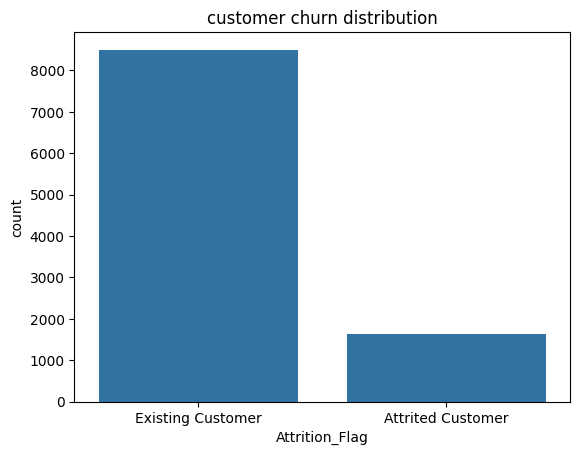

In [3]:
sns.countplot(x='Attrition_Flag', data=df)
plt.title('customer churn distribution')
plt.show() 

count    10127.000000
mean        46.325960
std          8.016814
min         26.000000
25%         41.000000
50%         46.000000
75%         52.000000
max         73.000000
Name: Customer_Age, dtype: float64


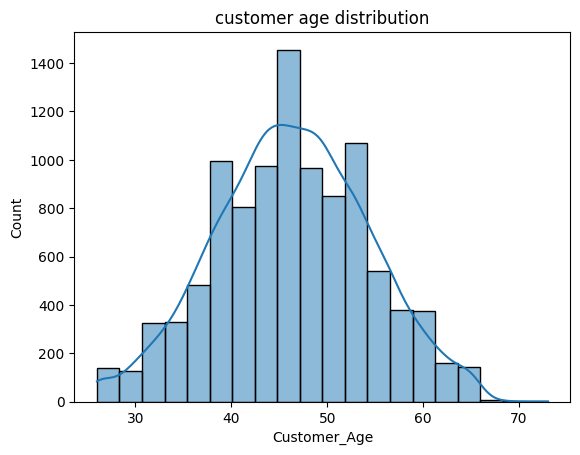

In [15]:
ages = df['Customer_Age']
print(ages.describe())
sns.histplot(ages, bins=20, kde=True)
plt.title('customer age distribution')
plt.show()

/var/folders/0y/cmyz7rnn4mn0841mr6yj1p680000gn/T/ipykernel_33848/2211602270.py:22: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_rate = df.groupby('Age_Group')['Attrition_Flag'].apply(


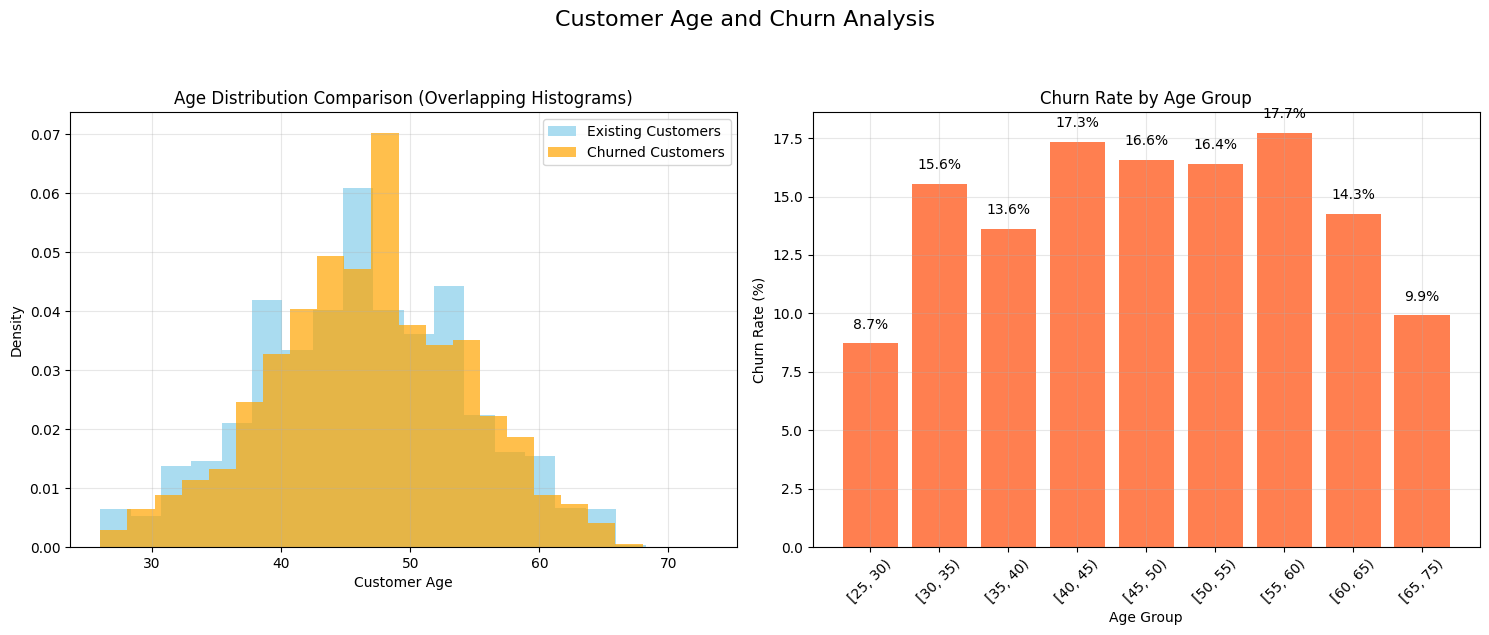

In [26]:
# Create subplots, only 2
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
plt.suptitle('Customer Age and Churn Analysis', fontsize=16, y=1.05)

# First plot: Overlapping histograms
ax1.hist(df[df['Attrition_Flag'] == 'Existing Customer']['Customer_Age'], 
         bins=20, alpha=0.7, label='Existing Customers', color='skyblue', density=True)
ax1.hist(df[df['Attrition_Flag'] == 'Attrited Customer']['Customer_Age'], 
         bins=20, alpha=0.7, label='Churned Customers', color='orange', density=True)
ax1.set_xlabel('Customer Age')
ax1.set_ylabel('Density')
ax1.set_title('Age Distribution Comparison (Overlapping Histograms)')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Second plot: Churn rate by age group
# Create age intervals
age_bins = [25, 30, 35, 40, 45, 50, 55, 60, 65, 75]
df['Age_Group'] = pd.cut(df['Customer_Age'], bins=age_bins, right=False)

# Calculate churn rate for each age group
churn_rate = df.groupby('Age_Group')['Attrition_Flag'].apply(
    lambda x: (x == 'Attrited Customer').sum() / len(x) * 100
).reset_index()
churn_rate['Age_Group_str'] = churn_rate['Age_Group'].astype(str)

ax2.bar(range(len(churn_rate)), churn_rate['Attrition_Flag'], color='coral')
ax2.set_xlabel('Age Group')
ax2.set_ylabel('Churn Rate (%)')
ax2.set_title('Churn Rate by Age Group')
ax2.set_xticks(range(len(churn_rate)))
ax2.set_xticklabels(churn_rate['Age_Group_str'], rotation=45)
ax2.grid(True, alpha=0.3)

# Display values on each bar
for i, v in enumerate(churn_rate['Attrition_Flag']):
    ax2.text(i, v + 0.5, f'{v:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()